<a href="https://colab.research.google.com/github/jiiiisoo/Studying/blob/main/%EC%9E%90%EB%A3%8C%EA%B5%AC%EC%A1%B0/2.%EB%B0%B0%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**배열**

***C배열 vs. python list***

***C배열***: 넣을 수 있는 데이터의 크기를 미리 고정해놓고 데이터를 입력하는데, 입력한 데이터는 수정은 가능하지만 삭제는 불가능하다. 또, 데이터는 한 가지의 type만 입력할 수 있다. 이유는 C배열의 경우 데이터의 크기를 memory에 연속적으로 예약해놓고 입력한 데이터들이 각각 예약한 칸에 저장이 되기 때문이다.

C배열은 numarray(n)으로 미리 크기를 고정하는데, 이 때 numarray가 memory에서 데이터 주소의 시작점을 알고있기 때문에 데이터를 찾을 때, 또는 저장할 때는 '처음주소 + 데이터크기 * 인덱스번호'를 하면 각 데이터의 주소를 한 번에 찾을 수 있어 처음 주소만 알면 O(1)밖에 안 걸린다. (RAM의 특성)

***Python list***: 넣을 수 있는 데이터의 크기를 미리 고정하지 않아도 되고, 입력한 데이터는 수정, 삭제, 추가(append)도 가능하다. 또 여러 데이터 type을 하나의 list에 담을 수 있는데, 그 이유는 python list의 경우 memory에 입력한 각 데이터를 직접 저장하는 것이 아니고 각 데이터들의 reference를 저장하기 때문이다.

***배열 탐색***

배열 탐색은 조건에 맞는 값을 배열 안에서 찾는 것인데, 이는 인덱스 0부터 n-1까지 하나하나 조건에 맞는 데이터를 찾아야하므로 비효율적이다. 이렇게 순서대로 데이터를 처음부터 하나하나 찾는 방법을 선형 탐색이라고 한다. 따라서 시간 복잡도는 데이터의 크기와 비례하므로 O(n)으로 나타내고, 이는 배열 접근인 O(1)보다 오래 걸림을 알 수 있다.

***정적배열 vs. 동적배열***

정적 배열: 그냥 배열이라고 하면 정적배열을 의미한다. 이는 C배열과 마찬가지로 크기와 데이터 type을 미리 고정한다. 여기서 데이터를 더 추가할 수 없는 이유는 이미 memory에 데이터가 저장될 공간을 예약해놨기 때문에 옆 공간이 비어있는 지 아닌 지 알 수 없어 추가할 수 없다. (저장은 연속적으로 해야하므로) 따라서 데이터를 추가하려면 저장할 데이터 크기를 크게 다시 고정한 뒤 앞의 데이터를 복사하고 추가해야 한다. 하지만 이 때 크기를 그렇다고 처음부터 너무 크게 하면 공간을 낭비할 수 있다.

동적 배열: 동적배열 또한 정적배열을 활용한 것인데, 정적배열과의 차이는 데이터를 추가할 수 있다는 점이다. 이유는 동적배열에서는 정해진 데이터 크기가 꽉 차도 새로운 데이터를 추가하면 자동으로 더 큰 메모리 공간을 확보하고 기존의 데이터를 복사한 뒤 데이터를 추가하기 때문이다. 이 때 확보하는 공간은 여유롭게 잡아서 (ex.2배) 데이터를 더 추가하더라도 다시 공간 확보를 하지 않아도 된다. 이러다가 또 공간이 차면 위의 과정을 반복한다.

***동적 배열 시간 복잡도***

메모리 남는 공간 있을 때: O(1) (하나만 추가하면 되므로)

메모리 남는 공간 없을 때: O(n+1)=O(n) (이미 있는 n개 데이터 복사 후 하나 추가하므로)

보통은 복잡도를 혹시 몰라서 O(n)으로 가정하지만, 사용하다 보면 그렇지 않을 때가 훨씬 많아 비합리적이다. 따라서 시간 복잡도를 계산하는 여러 방법이 있다.


***분할 상환 분석 개념(Amortized analysis)***: 같은 동작을 n번 하는 데 드는 시간이 X인 경우, 동작 한 번 하는 데 걸리는 시간=n/X

데이터 저장 시, 해야 하는 행동은 1. 새로운 데이터를 끝에 단순히 저장하는 데 걸리는 시간 2. 더 큰 배열 만들고 기존의 데이터 복사하는 데 걸리는 시간 을 고려해야 한다.

배열 끝에 새로운 데이터 저장: 데이터가 n개라면 O(n)

기존의 데이터 복사:

 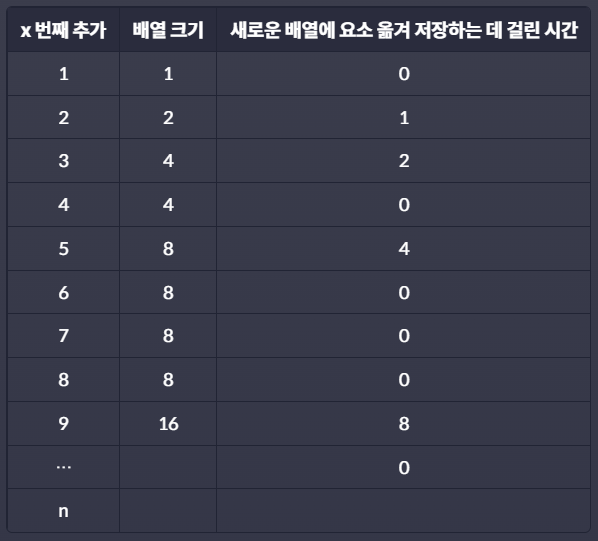

만약, 걸리는 시간이 8이라면 이는 9~16의 데이터를 저장해야 하기 때문에 8개의 데이터를 복사해서 새로운 16크기의 배열을 만들어 넣는 것이다. 이를 반복하면 최대가 m이라고 할 때, 걸리는 시간은 m+m/2+m/4+...+1 이다. 또, 이를 다 더하면 2m을 넘지 않음을 알 수 있다.

위 두 경우를 종합하면 총 n+2n=3n, 즉 O(3n)이므로 O(n)이라고 할 수 있다. 여기에 분할 상환 분석을 적용하면, 추가 연산을 n번 하는 데 걸리는 시간이 O(n)이므로 한 번 하는데는 O(n)/n=O(1)이 걸림을 알 수 있다.

따라서, 시간 복잡도는 최악의 경우 O(n)이, 분할 상환 분석을 적용하면 O(1)이 걸림을 알 수 있다.

***동적 배열 삽입 연산(insert operation)***

삽입은 추가와 다르게 원하는 인덱스에, 즉 데이터들 사이에 넣는 것이다. 따라서 이 때도 메모리의 공간이 있을 때와 없을 때로 나눌 수 있다. 데이터 삽입 시, 원하는 인덱스 뒤의 데이터들을 한 칸씩 뒤로 미룬 뒤 원하는 데이터를 집어 넣는다.

따라서 공간이 있을 때는 최악의 경우 n개의 데이터를 미루고 넣어야 하므로 O(n+1)=O(n)만큼 걸리고, 공간이 없을 때는 최악의 경우 n개의 데이터를 복사한 뒤 n개의 데이터를 뒤로 미루어 저장해야하므로 O(2n+1)=O(n)이 걸리므로 삽입 연산의 경우 두 경우 동일하게 O(n)만큼이 걸린다.

***동적 배열 삭제 연산***

데이터를 삭제하는 과정은 원하는 데이터를 삭제한 뒤, 원래 그 데이터 뒤에 있던 데이터들을 한 칸씩 앞으로 당겨준다. 따라서 최악의 경우, 인덱스 0번의 데이터 삭제 시 n-1개의 데이터를 앞으로 옮겨야 하므로 O(n-1)=O(n) 이 걸리고, 맨 뒤 데이터를 지울 때는 데이터 하나만 삭제하면 되므로 일정 시간 안에 할 수 있어 O(1)만큼이 걸린다.

하지만, 삭제할 때도 여러 데이터를 삭제한다면 필요 없는 공간이 많이 생겨 배열의 크기를 다시 조정하고 이 경우 원래 있던 데이터를 또 복사하여 넣는다. 필요 없는 공간이 어느 정도 되어야 크기를 조정하는 지는 프로그램 언어에 따라 다르다. 따라서, 맨 끝의 데이터를 삭제한다고 가정했을 때, 최악의 경우 남은 n개의 데이터를 삭제해야하므로 O(n)만큼이 걸린다. 하지만, 공간을 재배치 하는 경우도 흔치 않은 경우이므로 분할 상환을 적용하면 O(1)이 걸린다.

***배열 vs. 동적배열 정리***

시간 복잡도:

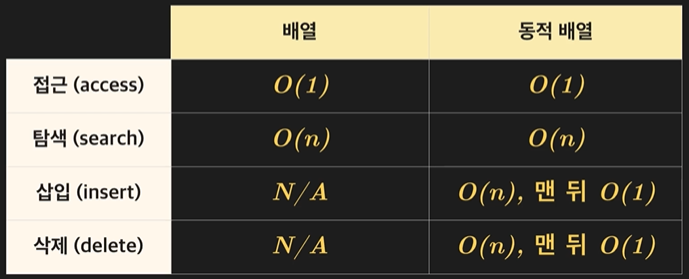

공간 낭비:

배열의 경우 크기 고정이므로 낭비되는 공간 없다.

동적 배열의 경우 공간이 낭비될 수도, 아닐 수도 있다. 최악의 경우는 새로운 데이터 하나를 추가할 때, 크기를 재배열하는 경우인데 흔히 크기는 원래있던 데이터의 2배로 늘리므로 낭비되는 공간은 n-2가 최악임을 알 수 있으므로 O(n-2)=O(n)만큼이 낭비된다.